### Import Libraries and Dataset

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
# load dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


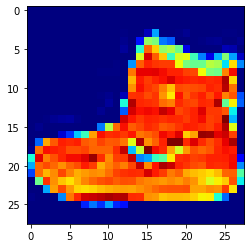

In [3]:
# visualize a sample image
plt.imshow(X_train[0], cmap = 'jet')

In [4]:
# check out the shape of the training data
X_train.shape
# contains 60000 images, each one is 28 pixels * 28 pixels

(60000, 28, 28)

In [5]:
X_test.shape
# contains 10000 images, each one is 28 pixels * 28 pixels

(10000, 28, 28)

### Perform data visualization

2


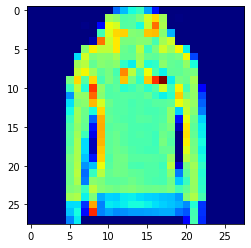

In [6]:
# view a random image
i = random.randint(1, 60000)
plt.imshow(X_train[i], cmap = 'jet')
# prints out the label
print(y_train[i])


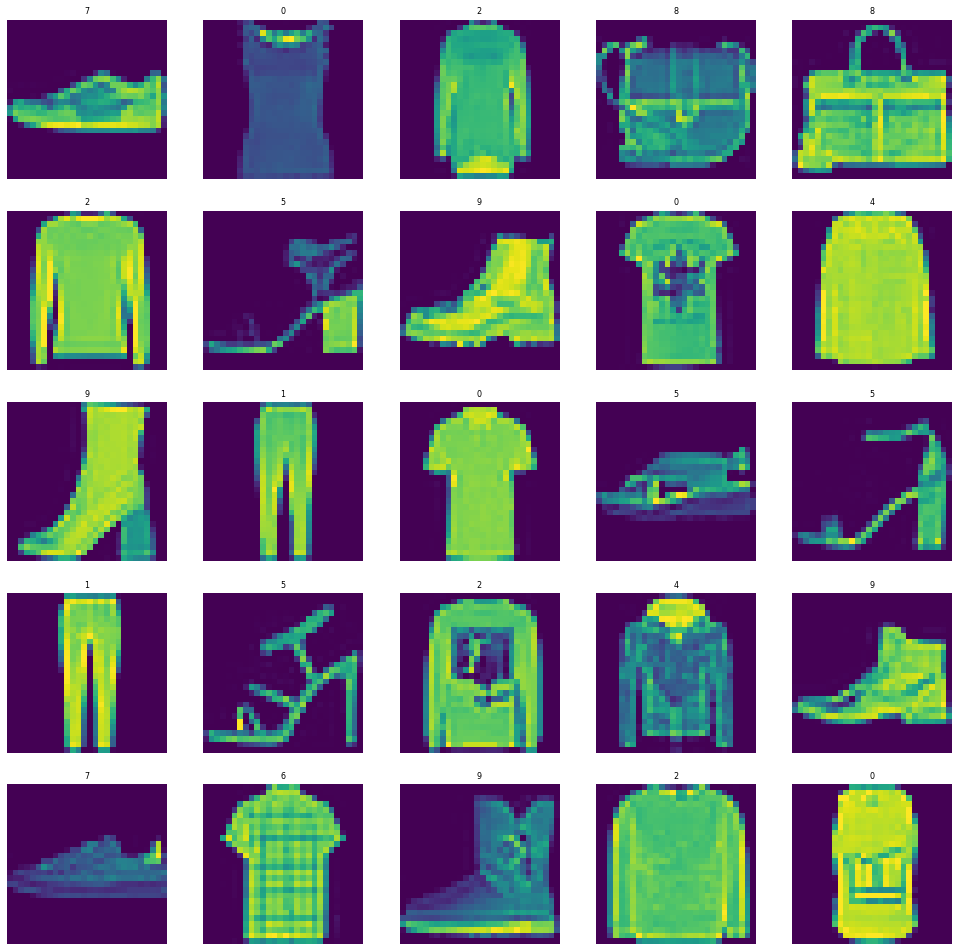

In [7]:
# view the images in a grid format
# Define the dimensions of the plot grid
W_grid = 5
L_gird = 5
# fig, axes = plt.subplots(L_gird, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_gird, W_grid,figsize = (17,17))
axes = axes.ravel() # flatten the 15x15 matrix into 255 array
n_training = len(X_train) #get the length of the training dataset

# select a random number from 0 to n_training
for i in np.arange(0, W_grid*L_gird):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    # print(i)
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')
plt.show()

### Data Preprocessing

In [8]:
X_train = X_train /255
X_test = X_test / 255

In [9]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [10]:
X_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [11]:
# add some noise
noise_factor = 0.3
noise_dataset = []
print(X_train[0].shape)
# the image shape is 28 * 28 pixels

(28, 28)


In [12]:
a = np.random.randn(*X_train[0].shape)
print(a.shape)
print(type(a))
shape = X_train[0].shape

(28, 28)
<class 'numpy.ndarray'>


In [13]:
# numpy.clip(a, a_min, a_max, out=None)[source]
x=np.array([[1,2,3,5,6,7,8,9],[1,2,3,5,6,7,8,9]])
np.clip(x,3,8)

array([[3, 3, 3, 5, 6, 7, 8, 8],
       [3, 3, 3, 5, 6, 7, 8, 8]])

In [14]:
for img in X_train:
    noisy_img = img + noise_factor * np.random.randn(*shape)
    # the value of pixels might be more than one
    # must clip the image to range between 0 and 1
    noisy_img = np.clip(noisy_img, 0, 1)
    noise_dataset.append(noisy_img)

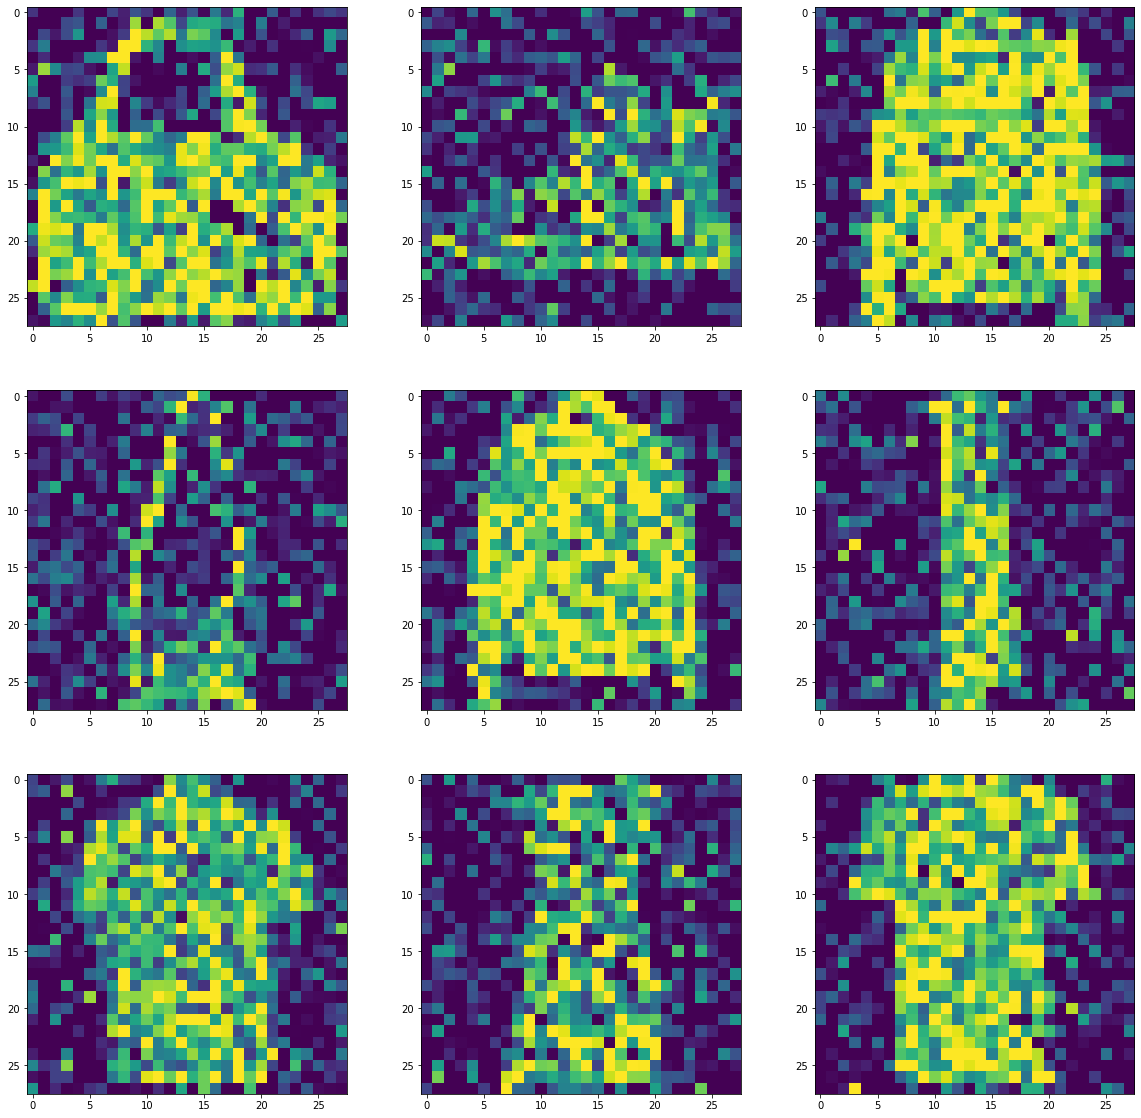

In [15]:
# show some examples of the noisy imgs
W_grid = 3
L_gird = 3
fig, axes = plt.subplots(L_gird, W_grid, figsize =
                         (20,20))
axes = axes.ravel()
n_training = len(noise_dataset)

for i in (np.arange(W_grid*L_gird)):
    index = np.random.randint(0, n_training)
    axes[i].imshow(noise_dataset[index])

In [16]:
# add some noise to test dataset
noise_factor = 0.2
noise_dataset_test = []
shape = X_test[0].shape
for img in X_test:
    noisy_img_test = img * noise_factor *np.random.randn(*shape)
    noisy_img_test = np.clip(noisy_img_test, 0, 1)
    noise_dataset_test.append(noisy_img_test)
    

### Build and train autoencoder deep learning model

In [17]:
autoencoder = tf.keras.models.Sequential()

# add layers to it
# use 16 filters
# strides specify how many pixels to be shifted

# encoded image layer
autoencoder.add(tf.keras.layers.Conv2D(
    filters = 16, kernel_size = 3, strides =2,
    padding = 'same',
    input_shape = (28, 28, 1)))

# add another layer filters = 8
autoencoder.add(tf.keras.layers.Conv2D(
    filters = 8, kernel_size = 3, strides =2,
    padding = 'same'))

# add another layer strides = 1
autoencoder.add(tf.keras.layers.Conv2D(
    filters = 8, kernel_size = 3, strides =1,
    padding = 'same'))

# decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(
    filters = 16, kernel_size = 3, strides =2,
    padding = 'same'))
# select activation function
autoencoder.add(tf.keras.layers.Conv2DTranspose(
    filters = 1, kernel_size = 3, strides =2,
    activation  = 'sigmoid',
    padding = 'same'))

In [19]:
# compile the model and visualize the summary
autoencoder.compile(loss = 'binary_crossentropy',
                    optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Apply fit method and Train the model
# input: noise_dataset
# output: the clean data
noise_dataset = np.array(noise_dataset)
noise_dataset_test = np.array(noise_dataset_test)
autoencoder.fit(noise_dataset.reshape(-1, 28, 28, 1),
                X_train.reshape(-1, 28, 28, 1),
                epochs = 10,
                batch_size = 200,
                validation_data= (noise_dataset_test.reshape(-1, 28, 28,1),
                X_test.reshape(-1, 28, 28, 1))
                )

Epoch 1/10
300/300 [==============================] - 8s 28ms/step - loss: 0.4003 - val_loss: 1.0721

### Evaluate Training Model Performance

In [23]:
# use evaluate() method and pass in the test dataset
evaluation = autoencoder.evaluate(noise_dataset_test.reshape(-1, 28, 28, 1)
                                  , X_test.reshape(-1, 28, 28, 1))
print('Test loss : {:.3f}'.format(evaluation))

313/313 [==============================] - 1s 3ms/step - loss: 1.0552

In [24]:
predicted = autoencoder.predict(noise_dataset_test[:10].reshape(-1, 28, 28, 1))

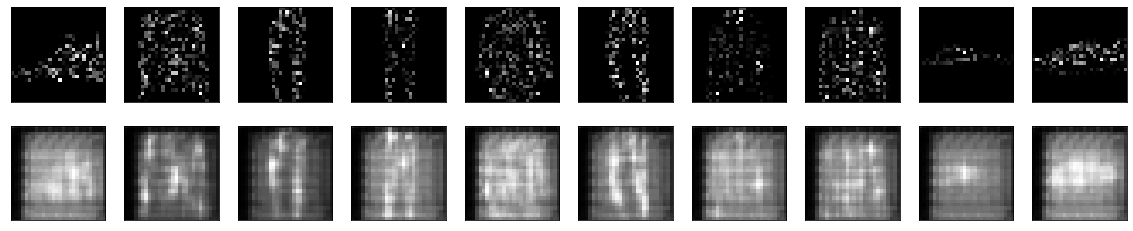

In [27]:
fig, axes = plt.subplots(nrows=2, ncols =10, sharex= True, figsize=(20, 4))
for images, row in zip ([noise_dataset_test[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)